CNN model with parameters refering from AlexNet
The input data are preprocessed grayscale images(one channel for every pixel.)

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Use TensorFlow's Keras API
# Example of using Keras API directly from TensorFlow
# keras_layers = tf.keras.layers
# keras_utils = tf.keras.utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

2023-11-21 08:20:18.570573: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 08:20:19.252559: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhangze6/Research/cudnn-11.2-linux-x64-v8.1.1.33/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-11-21 08:20:19.252600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhangze6/Research/cudnn-11.2-li

2.11.0
2.11.0


In [2]:
images = np.load("../images_CNN.npy")
print(images.shape)
labels = np.load("../labels_CNN.npy")
print(labels.shape)

(1728, 256, 256)
(1728,)


In [4]:
unique_labels, counts = np.unique(labels, return_counts=True)
unique_labels

array(['Cas', 'Gem', 'Ori', 'Per', 'ST', 'UM'], dtype='<U3')

In [5]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)
labels_encoded

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [6]:
images = images/255
images.max()

1.0

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
print(x_train.shape)
print(y_train.shape)

(1382, 256, 256)
(1382, 6)


Original AlexNet

In [8]:
from tensorflow.keras import layers, models

def alexnet_inspired(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.BatchNormalization())

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.BatchNormalization())

    # Remaining Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet_model = alexnet_inspired(input_shape=(256, 256, 1), num_classes=6)
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(alexnet_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

2023-11-21 08:21:48.032478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 08:21:48.040030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 08:21:48.040360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 08:21:48.040875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [9]:
alexnet_model.fit(x_train, y_train, epochs=5, batch_size=32) 

Epoch 1/5


2023-11-21 08:22:21.542724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-11-21 08:22:22.729371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-21 08:22:22.732284: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x56099f616c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-21 08:22:22.732298: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2023-11-21 08:22:22.735731: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-21 08:22:22.828382: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime 

44/44 [==============================] - 5s 21ms/step - loss: 3.7300 - accuracy: 0.1592
Epoch 2/5
44/44 [==============================] - 1s 17ms/step - loss: 1.7933 - accuracy: 0.1577
Epoch 3/5
44/44 [==============================] - 1s 17ms/step - loss: 1.7924 - accuracy: 0.1643
Epoch 4/5
44/44 [==============================] - 1s 17ms/step - loss: 1.7935 - accuracy: 0.1520
Epoch 5/5
44/44 [==============================] - 1s 16ms/step - loss: 1.7930 - accuracy: 0.1592


11/11 [==============================] - 0s 25ms/step


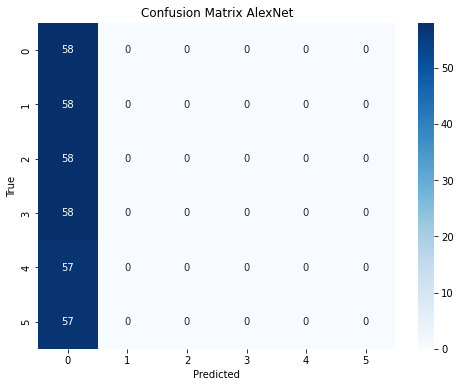

              precision    recall  f1-score   support

           0       0.17      1.00      0.29        58
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        57

    accuracy                           0.17       346
   macro avg       0.03      0.17      0.05       346
weighted avg       0.03      0.17      0.05       346


/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [10]:
predicted_alex_prob = alexnet_model.predict(x_test)
predicted_alex_labels = np.argmax(predicted_alex_prob, axis=1)

cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix AlexNet')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels))

Remove the FCLs

In [13]:
from tensorflow.keras import layers, models

def alexnet_inspired(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.BatchNormalization())

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.BatchNormalization())

    # Remaining Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    # model.add(layers.Dense(4096, activation='relu'))
    # model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(4096, activation='relu'))
    # model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet_model = alexnet_inspired(input_shape=(256, 256, 1), num_classes=6)

# Print the model summary
print(alexnet_model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 96)        11712     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                      

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

f1_scores = []
for iter in range(10):
  alexnet_model = alexnet_inspired(input_shape=(256, 256, 1), num_classes=6)
  alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  alexnet_model.fit(x_train, y_train, epochs=20, batch_size=32)

  predicted_alex_prob = alexnet_model.predict(x_test)
  predicted_alex_labels = np.argmax(predicted_alex_prob, axis=1)

  # Calculate F1 score and append to the list
  f1 = f1_score(np.argmax(y_test, axis=1), predicted_alex_labels, average='macro')  # Change average as needed
  f1_scores.append(f1)

  # Optional: Print F1 score for each iteration
  print(f"Iteration {iter+1}: F1 Score = {f1}")

# After all iterations, you can print or analyze all F1 scores
print(f"All F1 Scores: {f1_scores}")

Epoch 1/20
44/44 [==============================] - 2s 13ms/step - loss: 2.2561 - accuracy: 0.3329
Epoch 2/20
44/44 [==============================] - 1s 13ms/step - loss: 1.0967 - accuracy: 0.5724
Epoch 3/20
44/44 [==============================] - 1s 13ms/step - loss: 0.8217 - accuracy: 0.6983
Epoch 4/20
44/44 [==============================] - 1s 13ms/step - loss: 0.5628 - accuracy: 0.7887
Epoch 5/20
44/44 [==============================] - 1s 13ms/step - loss: 0.5035 - accuracy: 0.8234
Epoch 6/20
44/44 [==============================] - 1s 13ms/step - loss: 0.1971 - accuracy: 0.9342
Epoch 7/20
44/44 [==============================] - 1s 13ms/step - loss: 0.1148 - accuracy: 0.9595
Epoch 8/20
44/44 [==============================] - 1s 12ms/step - loss: 0.3742 - accuracy: 0.8821
Epoch 9/20
44/44 [==============================] - 1s 12ms/step - loss: 0.1254 - accuracy: 0.9580
Epoch 10/20
44/44 [==============================] - 1s 12ms/step - loss: 0.0649 - accuracy: 0.9797
Epoch 11/

In [15]:
# Assuming f1_scores is your list of F1 scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)

print(f"Mean F1 Score: {f1_mean}")
print(f"Standard Deviation of F1 Scores: {f1_std}")


Mean F1 Score: 0.8211617153585005
Standard Deviation of F1 Scores: 0.045536101701191635


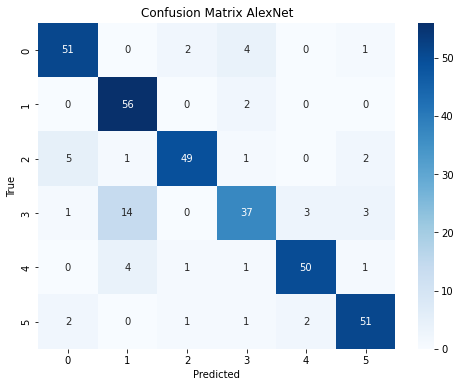

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        58
           1       0.75      0.97      0.84        58
           2       0.92      0.84      0.88        58
           3       0.80      0.64      0.71        58
           4       0.91      0.88      0.89        57
           5       0.88      0.89      0.89        57

    accuracy                           0.85       346
   macro avg       0.85      0.85      0.85       346
weighted avg       0.85      0.85      0.85       346


In [16]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix AlexNet')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels))

Without Normalization

In [17]:
from tensorflow.keras import layers, models

def alexnet_inspired(input_shape, num_classes):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # model.add(layers.BatchNormalization())

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # model.add(layers.BatchNormalization())

    # Remaining Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    # model.add(layers.Dense(4096, activation='relu'))
    # model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(4096, activation='relu'))
    # model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet_model = alexnet_inspired(input_shape=(256, 256, 1), num_classes=6)

# Print the model summary
print(alexnet_model.summary())


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 62, 62, 96)        11712     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 30, 30, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 14, 14, 384)       885120    
                                                                 
 conv2d_73 (Conv2D)          (None, 14, 14, 384)     

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

f1_scores = []
for iter in range(10):
  alexnet_model = alexnet_inspired(input_shape=(256, 256, 1), num_classes=6)
  alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  alexnet_model.fit(x_train, y_train, epochs=20, batch_size=32)

  predicted_alex_prob = alexnet_model.predict(x_test)
  predicted_alex_labels = np.argmax(predicted_alex_prob, axis=1)

  # Calculate F1 score and append to the list
  f1 = f1_score(np.argmax(y_test, axis=1), predicted_alex_labels, average='macro')  # Change average as needed
  f1_scores.append(f1)

  # Optional: Print F1 score for each iteration
  print(f"Iteration {iter+1}: F1 Score = {f1}")

# After all iterations, you can print or analyze all F1 scores
print(f"All F1 Scores: {f1_scores}")

Epoch 1/20
44/44 [==============================] - 2s 14ms/step - loss: 1.6537 - accuracy: 0.2851
Epoch 2/20
44/44 [==============================] - 1s 12ms/step - loss: 1.2656 - accuracy: 0.5224
Epoch 3/20
44/44 [==============================] - 1s 12ms/step - loss: 0.9975 - accuracy: 0.6013
Epoch 4/20
44/44 [==============================] - 1s 13ms/step - loss: 0.8321 - accuracy: 0.6744
Epoch 5/20
44/44 [==============================] - 1s 13ms/step - loss: 0.5733 - accuracy: 0.7880
Epoch 6/20
44/44 [==============================] - 1s 13ms/step - loss: 0.4399 - accuracy: 0.8307
Epoch 7/20
44/44 [==============================] - 1s 13ms/step - loss: 0.3483 - accuracy: 0.8712
Epoch 8/20
44/44 [==============================] - 1s 13ms/step - loss: 0.1000 - accuracy: 0.9703
Epoch 9/20
44/44 [==============================] - 1s 12ms/step - loss: 0.1160 - accuracy: 0.9645
Epoch 10/20
44/44 [==============================] - 1s 12ms/step - loss: 0.1627 - accuracy: 0.9407
Epoch 11/

In [19]:
# Assuming f1_scores is your list of F1 scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)

print(f"Mean F1 Score: {f1_mean}")
print(f"Standard Deviation of F1 Scores: {f1_std}")

Mean F1 Score: 0.8102237491070999
Standard Deviation of F1 Scores: 0.029928871499604166


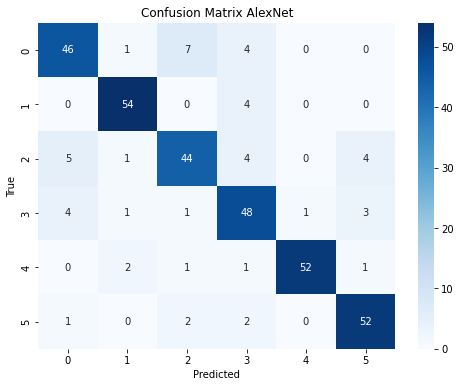

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.92      0.93      0.92        58
           2       0.80      0.76      0.78        58
           3       0.76      0.83      0.79        58
           4       0.98      0.91      0.95        57
           5       0.87      0.91      0.89        57

    accuracy                           0.86       346
   macro avg       0.86      0.86      0.86       346
weighted avg       0.86      0.86      0.86       346


In [20]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix AlexNet')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_alex_labels))